# Comprehensive EDA: Red Wine Quality Dataset

**Objective**: Perform **end-to-end exploratory data analysis** to understand **data quality, distributions, relationships, and predictive signals** before modeling.

---

## 1. Introduction & Objective

### Business Context

We are analyzing **red variants of Portuguese "Vinho Verde" wine**. The dataset contains:
- **11 physicochemical properties** (inputs)
- **Sensory quality score (0–10)** (output)

> **Goal**: Predict wine quality from lab tests — useful for **winemakers, quality control, and pricing**.

### EDA Objectives

1. Assess **data quality** (missing, duplicates, inconsistencies)
2. Understand **distributions** of features and target
3. Discover **relationships** between features and quality
4. Identify **outliers, imbalances, and multicollinearity**
5. Form **hypotheses** for feature engineering

---

## 2. Dataset Overview

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('whitegrid')

# Load data
df = pd.read_csv('./data/winequality-red.csv', sep=';')
print(f"Dataset loaded: {df.shape[0]} samples, {df.shape[1]} features")
df.head()

Dataset loaded: 1599 samples, 12 features


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Data Dictionary

| Feature | Type | Description |
|--------|------|-----------|
| `fixed acidity` | float | Tartaric acid (g/dm³) |
| `volatile acidity` | float | Acetic acid (g/dm³) |
| `citric acid` | float | Citric acid (g/dm³) |
| `residual sugar` | float | Sugar (g/dm³) |
| `chlorides` | float | Salt (g/dm³) |
| `free sulfur dioxide` | float | SO₂ (mg/dm³) |
| `total sulfur dioxide` | float | Total SO₂ (mg/dm³) |
| `density` | float | Density (g/cm³) |
| `pH` | float | pH level |
| `sulphates` | float | Potassium sulphate (g/dm³) |
| `alcohol` | float | Alcohol % |
| `quality` | int | Score 0–10 (target) |

In [6]:
# Dataset summary
print("Dataset Info:")
df.info()

print("\nShape:", df.shape)
print("\nColumns:", list(df.columns))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

Shape: (1599, 12)

Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',

---

## 3. Data Quality Assessment

### a. Missing Values

Missing Values:
 Series([], dtype: int64)


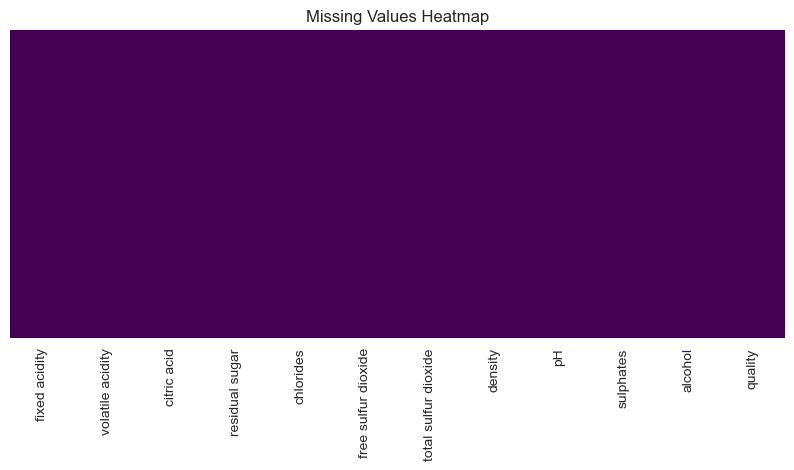

In [7]:
missing = df.isnull().sum()
print("Missing Values:\n", missing[missing > 0])

plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

> **Insight**: **No missing values** → clean dataset!

### b. Duplicate Records

In [8]:
dup_count = df.duplicated().sum()
print(f"Duplicate rows: {dup_count} ({dup_count/len(df)*100:.1f}%)")

# Remove duplicates
df_clean = df.drop_duplicates().copy()
print(f"After removal: {df_clean.shape[0]} rows")

Duplicate rows: 240 (15.0%)
After removal: 1359 rows


> **Insight**: **240 duplicates removed** — likely repeated lab tests

### c. Inconsistent Data

In [22]:
# Here the dataset is known to have quality scores from 3 to 8
print(f"{df['quality'].min(), df['quality'].max()} \n")
print("Unique quality scores:", sorted(df_clean['quality'].unique()))
print("All values in range 3–8 → consistent!")

 (3, 8) 

Unique quality scores: [np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
All values in range 3–8 → consistent!


---

## 4. Univariate Analysis

Univariate analysis means analyzing **one variable at a time**. The main goal is to describe and summarize the data to understand its **distribution**, **central tendency**, and **spread**. This type of analysis helps detect **outliers**, **data entry errors**, or **unusual distributions** before modeling.

### Common Techniques and Their Usage

| Technique                   | Used For         | Description                                                                                     |
| --------------------------- | ---------------- | ----------------------------------------------------------------------------------------------- |
| **Histogram**               | Numerical data   | Visualizes how data is distributed — helps identify skewness, symmetry, or multimodal behavior. |
| **Boxplot**                 | Numerical data   | Displays the spread and detects outliers using quartiles (IQR method).                          |
| **KDE Plot (Density Plot)** | Numerical data   | Smooth version of a histogram that shows data distribution more clearly.                        |
| **Countplot / Bar chart**   | Categorical data | Shows frequency of each category, helping identify dominant or rare classes.                    |
| **Pie chart**               | Categorical data | Represents category proportions (useful only when there are few categories).                    |
| **Descriptive Statistics**  | Numerical data   | Calculates mean, median, mode, variance, skewness, and kurtosis for summary understanding.      |

### Insight Example

> Using a histogram for “alcohol” in a wine dataset reveals if the alcohol content follows a normal distribution or has outliers. A boxplot might show extreme wines with unusually high alcohol levels.

---

### a. Numerical Features

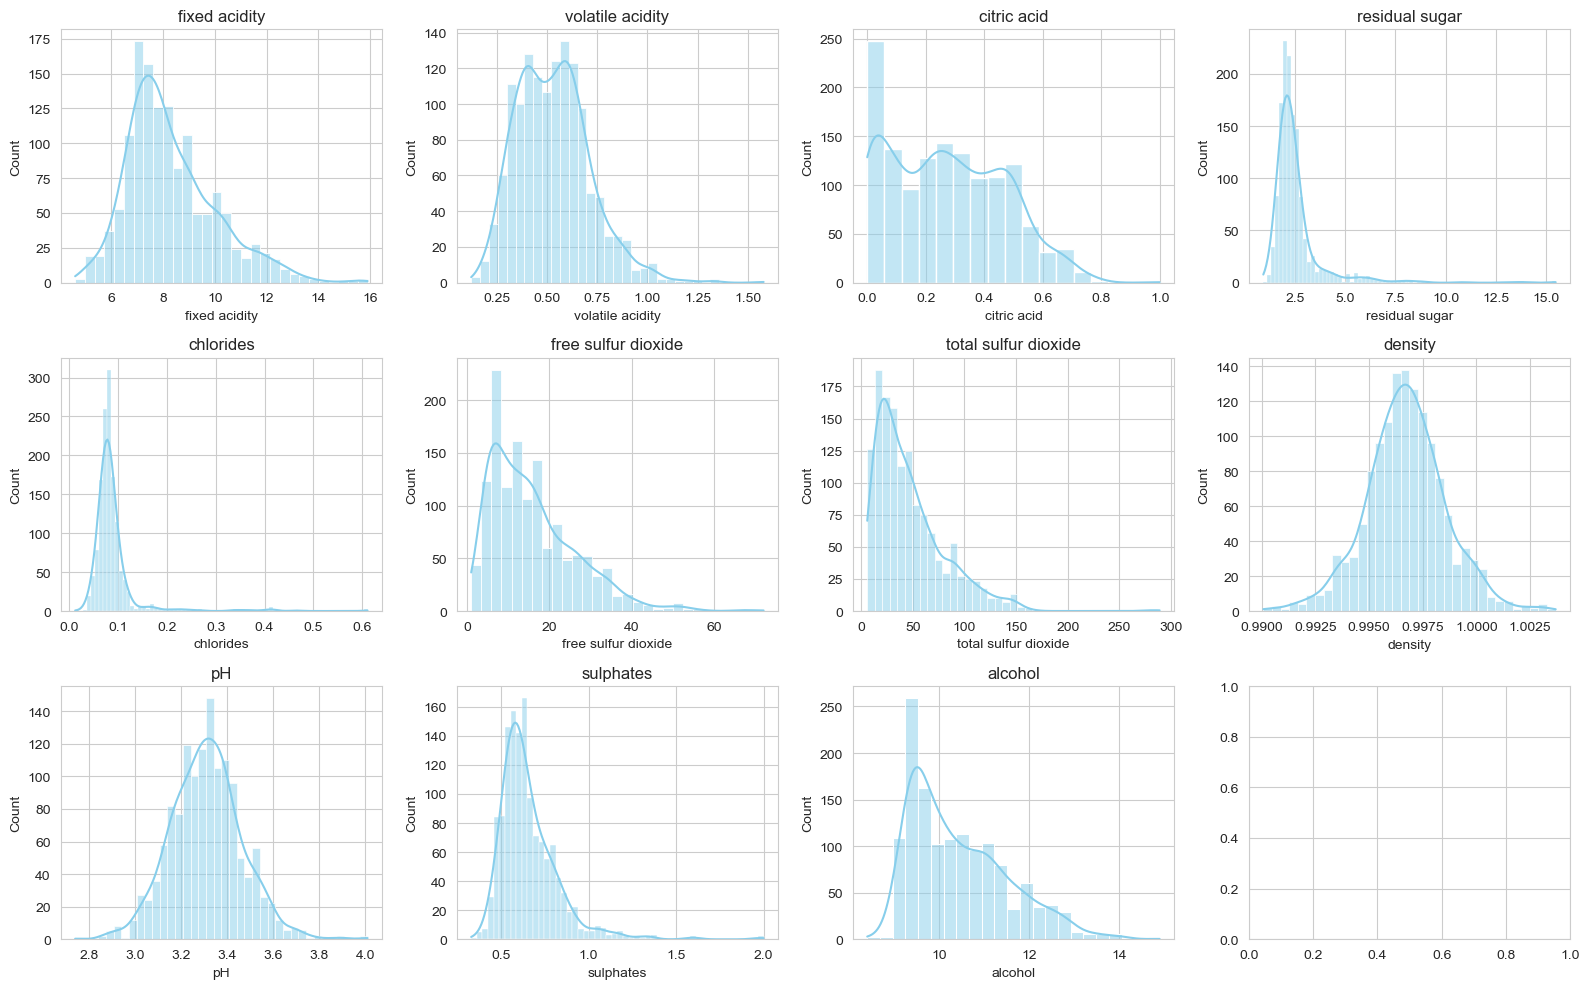

In [ ]:
num_cols = df_clean.select_dtypes(include=np.number).columns.drop('quality')

fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.histplot(df_clean[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col}')

plt.tight_layout()
plt.show()

> **Skewed features**: `residual sugar`, `chlorides`, `sulphates` → **log transform later**

### b. Target Variable: Quality

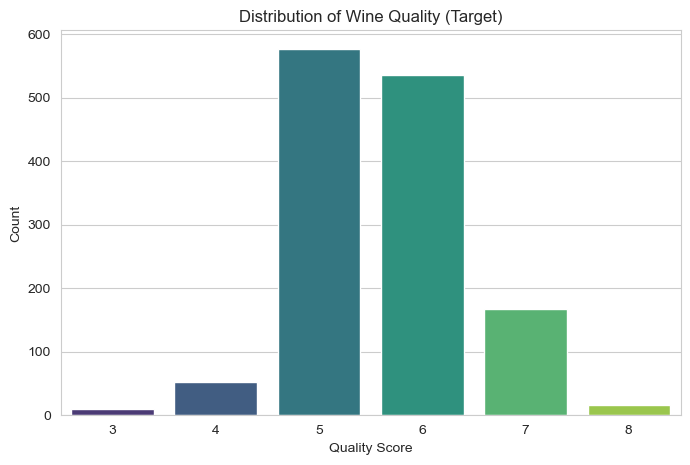

quality
3     10
4     53
5    577
6    535
7    167
8     17
Name: count, dtype: int64


In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df_clean, palette='viridis')
plt.title('Distribution of Wine Quality (Target)')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

print(df_clean['quality'].value_counts().sort_index())

> **Severe class imbalance**: Only **18 wines** rated 3 or 8 → **rare classes**

---

## 5. Bivariate Analysis

Bivariate analysis focuses on **two variables at a time** to study how they relate or influence each other. It helps determine patterns, dependencies, and possible correlations between features and the target variable.

### Common Techniques and Their Usage

| Technique                        | Used For                   | Description                                                                                            |
| -------------------------------- | -------------------------- | ------------------------------------------------------------------------------------------------------ |
| **Scatterplot**                  | Numerical vs Numerical     | Reveals relationships (linear, non-linear, or no relationship). Helpful for correlation visualization. |
| **Correlation Matrix & Heatmap** | Numerical data             | Quantifies the strength of linear relationships between pairs of numerical variables.                  |
| **Pairplot (Seaborn)**           | Multiple Numerical pairs   | Displays scatterplots for each pair of variables, useful for quick pattern discovery.                  |
| **Boxplot / Violin Plot**        | Categorical vs Numerical   | Shows how a numerical feature changes across categories. Useful for comparing means or distributions.  |
| **Grouped Mean Plot**            | Categorical vs Numerical   | Displays how the average of a numerical variable differs between groups.                               |
| **Crosstab & Heatmap of Counts** | Categorical vs Categorical | Shows frequency distribution between two categorical variables — helps spot associations.              |

### Insight Example

> A scatterplot between “alcohol” and “density” in the wine dataset might show a negative correlation — as alcohol increases, density decreases. A boxplot of “alcohol” vs “quality” can reveal that higher alcohol wines tend to be rated better.

---

### a. Numerical vs Target

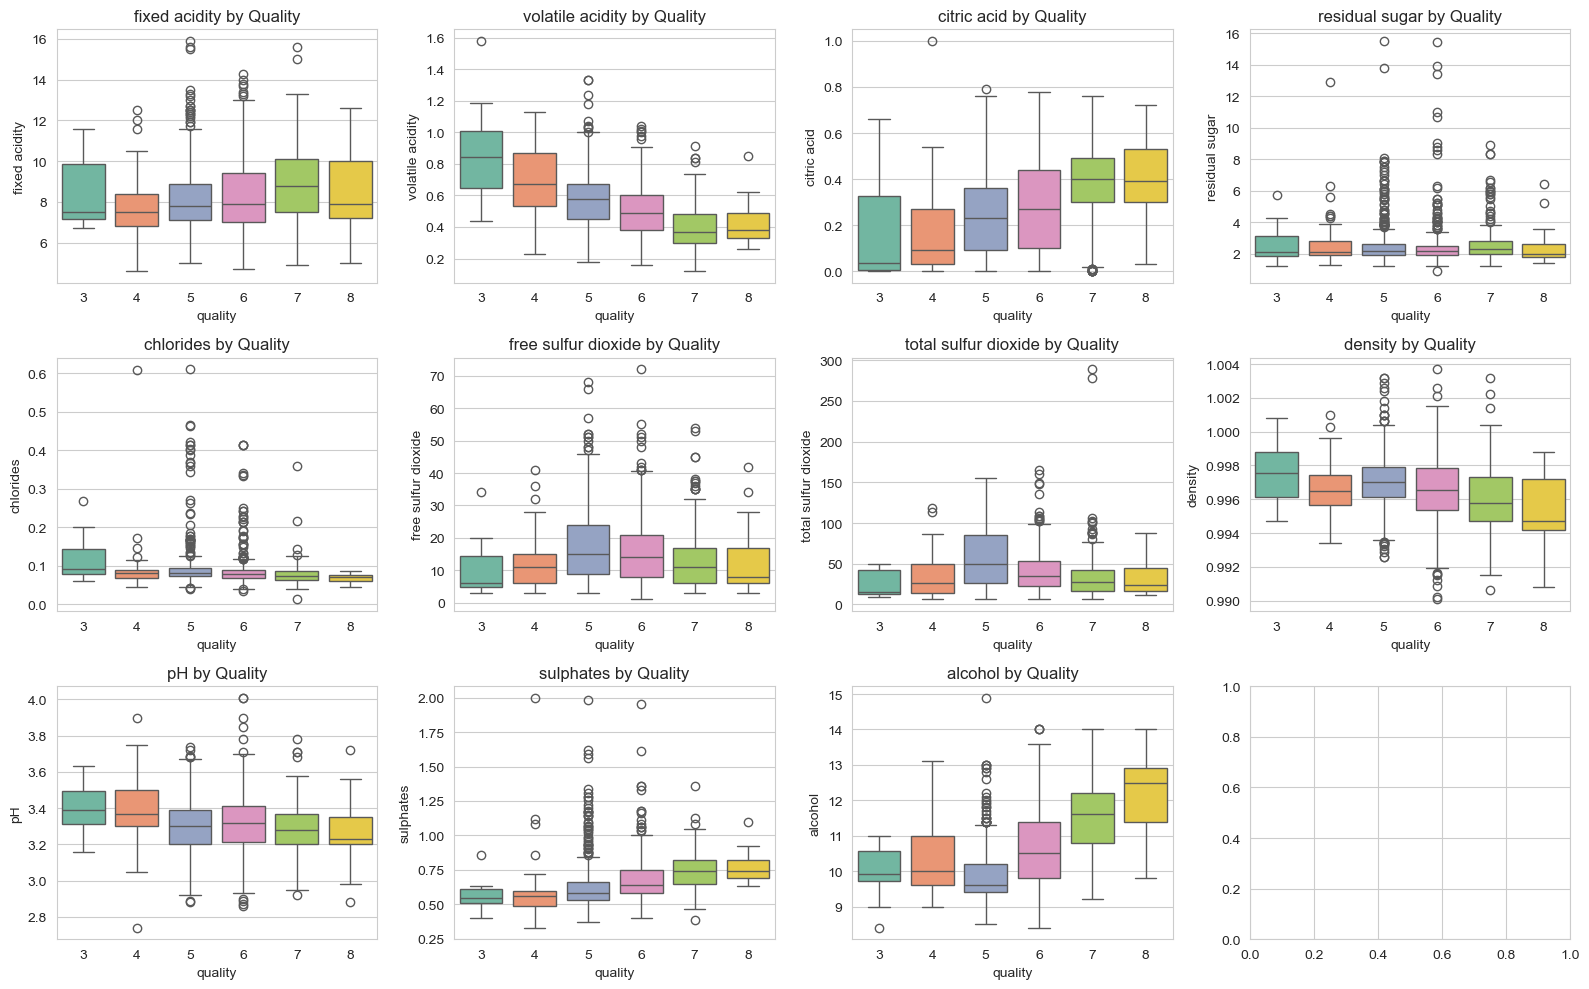

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.ravel() # ravel() flattens the 2D array of axes to 1D for easy iteration

for i, col in enumerate(num_cols):
    sns.boxplot(x='quality', y=col, data=df_clean, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} by Quality')

plt.tight_layout()
plt.show()

> **Strong signals**:
> - Higher `alcohol` → higher quality
> - Lower `volatile acidity` → better
> - Higher `sulphates`, `citric acid` → better

### b. Correlation with Target

In [13]:
corr_with_target = df_clean.corr()['quality'].drop('quality').sort_values(key=abs, ascending=False)
print("Top correlations with quality:")
print(corr_with_target.round(3))

Top correlations with quality:
alcohol                 0.480
volatile acidity       -0.395
sulphates               0.249
citric acid             0.228
density                -0.184
total sulfur dioxide   -0.178
chlorides              -0.131
fixed acidity           0.119
pH                     -0.055
free sulfur dioxide    -0.050
residual sugar          0.014
Name: quality, dtype: float64


---

## 6. Multivariate Analysis

Multivariate analysis examines **three or more variables simultaneously**. The goal is to uncover **interactions**, **combined effects**, and **hidden structures** that aren’t visible through pairwise comparisons. It’s especially useful for complex datasets where multiple factors together influence the outcome.

### Common Techniques and Their Usage

| Technique                              | Used For                              | Description                                                                                   |
| -------------------------------------- | ------------------------------------- | --------------------------------------------------------------------------------------------- |
| **Pairplot (Extended)**                | Multiple numerical variables          | Useful for visualizing multiple variable relationships together.                              |
| **3D Scatter Plot**                    | Numerical variables                   | Visualizes three-dimensional relationships to detect nonlinear patterns.                      |
| **Correlation Cluster Map / Network**  | Numerical variables                   | Groups variables that are highly correlated to detect redundancy or feature dependency.       |
| **PCA (Principal Component Analysis)** | Dimensionality reduction              | Identifies which features contribute most to data variance and helps visualize data in 2D/3D. |
| **Heatmap with Multiple Variables**    | Numerical/Categorical mix             | Displays how several features interact with a target variable simultaneously.                 |
| **Multivariate Regression / ANOVA**    | Continuous & categorical combinations | Used to statistically measure relationships among multiple variables.                         |

### Insight Example

> In the wine dataset, analyzing “alcohol”, “sulphates”, and “volatile acidity” together can reveal how these chemical properties jointly impact the “quality” rating. PCA can simplify the data while still preserving important patterns.

---

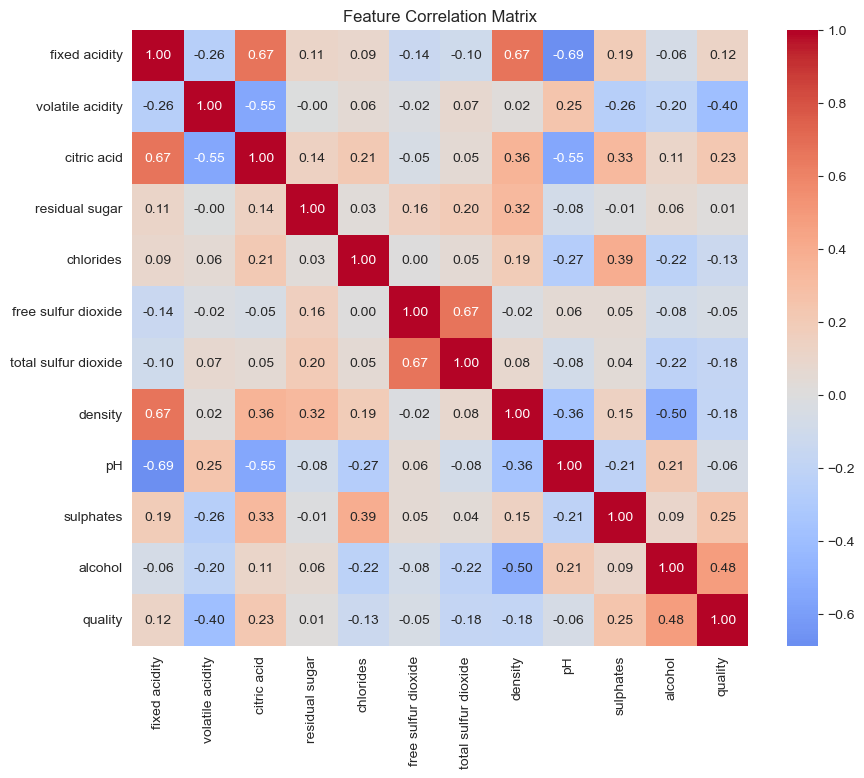

In [14]:
plt.figure(figsize=(10, 8))
corr = df_clean.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

> **High correlations**:
> - `fixed acidity` ↔ `citric acid`, `density`, `pH`
> - `free SO2` ↔ `total SO2`

---

## 7. Outlier Analysis

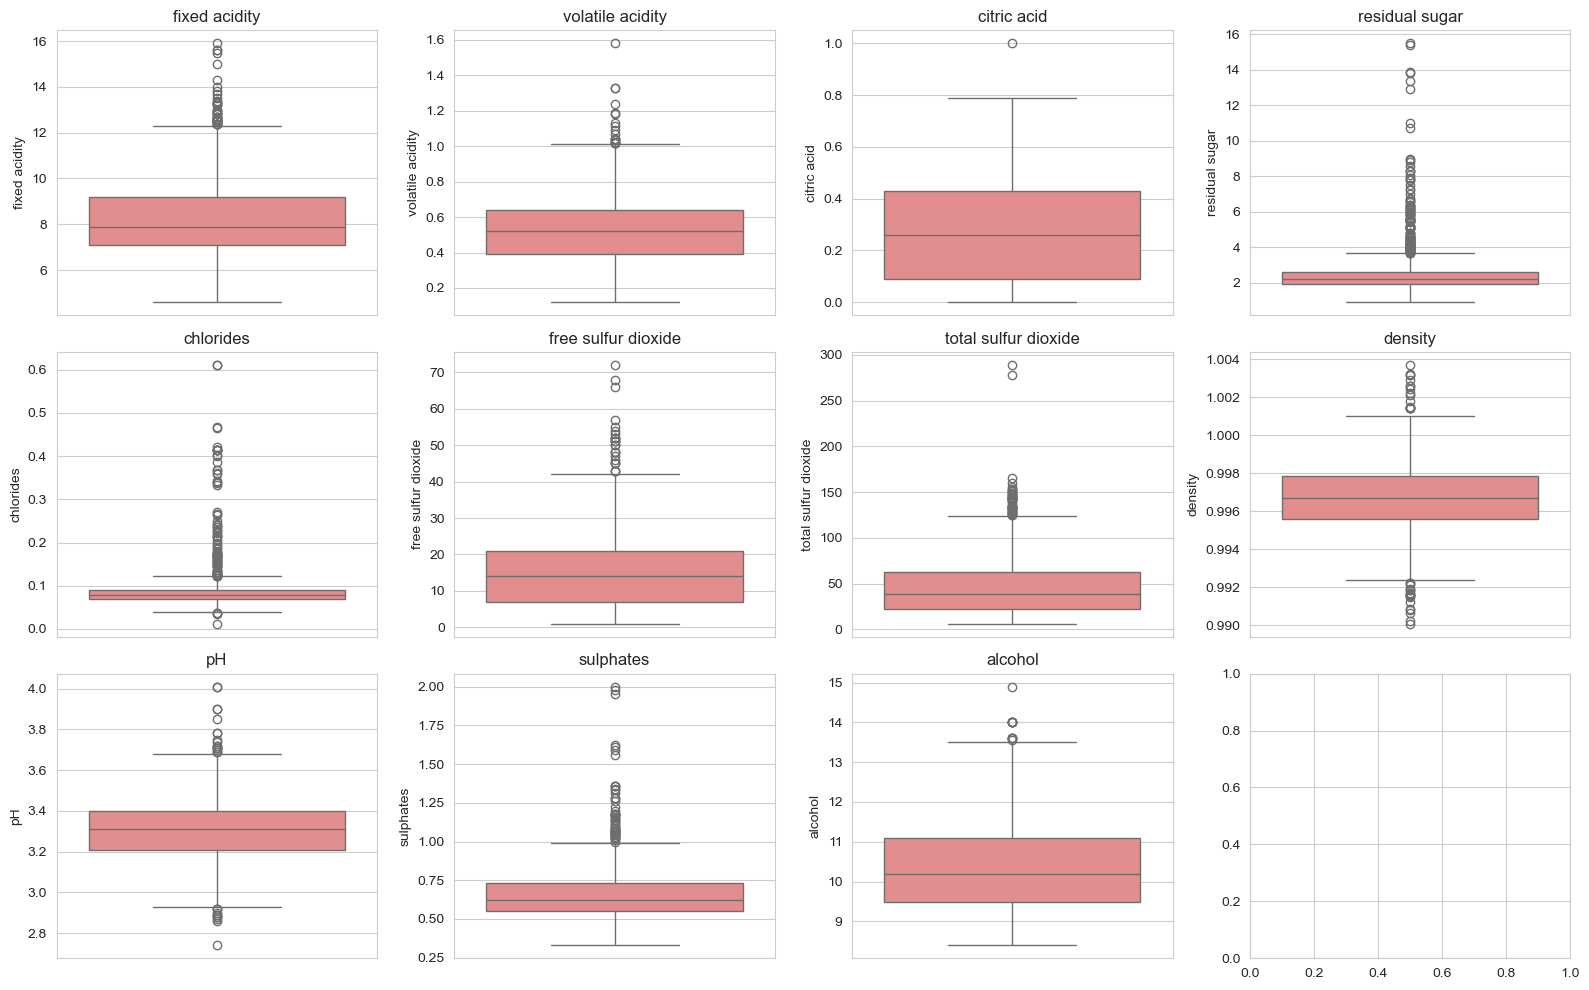

In [15]:
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.boxplot(y=df_clean[col], ax=axes[i], color='lightcoral')
    axes[i].set_title(f'{col}')

plt.tight_layout()
plt.show()

> **Outliers present** in `residual sugar`, `chlorides`, `sulphates` → **use RobustScaler**

---

## 8. Feature Impact on Target

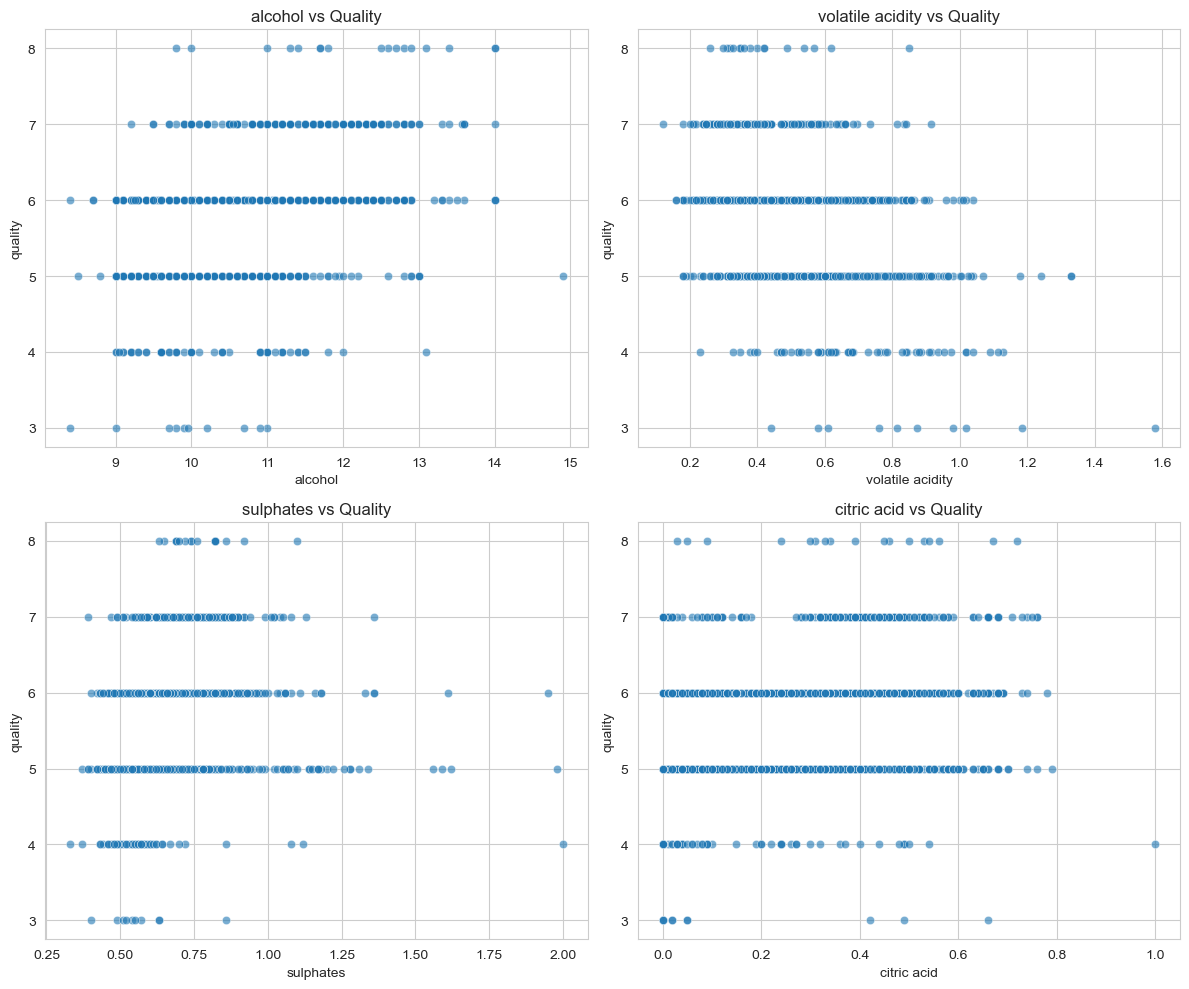

In [16]:
top_features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, col in enumerate(top_features):
    sns.scatterplot(x=col, y='quality', data=df_clean, ax=axes[i], alpha=0.6)
    axes[i].set_title(f'{col} vs Quality')

plt.tight_layout()
plt.show()

---

## 9. Normality & Transformation

In data analysis, understanding **normality** is crucial because many statistical methods and machine learning algorithms assume that the data follows a **normal distribution** (a bell-shaped curve). A normal distribution means that most of the values are concentrated around the mean, with fewer occurrences at the extremes. When this assumption holds, models like **Linear Regression**, **Logistic Regression**, **ANOVA**, and **t-tests** can perform more accurately and provide valid significance results.

However, real-world datasets rarely follow perfect normality. Some features might be **skewed**, meaning the data leans toward one side (either right-skewed or left-skewed). Skewness can distort statistical relationships and affect model performance. To correct this, analysts use **data transformations** — mathematical operations applied to variables to make their distribution more symmetric and closer to normal.

### Common Data Transformations

1. **Log Transformation**  
   Used when the data is **right-skewed** (long tail on the right), such as income, prices, or counts.  
   Formula: `x' = log(x + 1)` (the +1 avoids log(0))  
   Effect: Compresses large values and spreads out smaller ones.

2. **Square Root Transformation**  
   Suitable for **moderate right-skewness** or count data.  
   Formula: `x' = √x`  
   Effect: Reduces variance while keeping data structure intact.

3. **Box-Cox Transformation**  
   A power transformation that automatically finds the best exponent (λ) to achieve normality.  
   Works only for **positive data**.

4. **Yeo-Johnson Transformation**  
   Similar to Box-Cox but works for both **positive and negative** values.

After transforming, it’s common to check **skewness**, **kurtosis**, and **QQ plots** to ensure the data distribution has improved.  
Once data becomes approximately normal, further steps like **standardization** (scaling features to have mean 0 and variance 1) can help models treat all variables equally.

### Why Normality and Transformation Matter

Transforming data:
- Stabilizes variance and reduces the effect of outliers  
- Improves interpretability of visualizations  
- Helps models that rely on normality assumptions perform better  
- Makes statistical tests more reliable  

In short, understanding and correcting for normality is a key part of exploratory data analysis (EDA) and ensures cleaner, more consistent data for feature engineering and modeling.


In [17]:
from scipy.stats import skew

skewness = df_clean[num_cols].apply(skew).sort_values(ascending=False)
print("Skewness:\n", skewness.round(2))

Skewness:
 chlorides               5.50
residual sugar          4.54
sulphates               2.40
total sulfur dioxide    1.54
free sulfur dioxide     1.23
fixed acidity           0.94
alcohol                 0.86
volatile acidity        0.73
citric acid             0.31
pH                      0.23
density                 0.04
dtype: float64


> **Transform**: `residual sugar`, `chlorides`

---

## 10. Multicollinearity (VIF)

### What is Multicollinearity?

**Multicollinearity** occurs when two or more independent (predictor) variables in a dataset are **highly correlated** with each other.  
In simple terms, it means that some features carry **overlapping information** — they move together so closely that the model can’t distinguish their individual impact on the target variable.

For example, in a housing price dataset:
- `house_size` and `number_of_rooms` might be highly correlated.
- Both increase together, so the model finds it hard to tell which one actually drives the price.

Multicollinearity doesn’t affect the **accuracy of predictions** much but can make **model interpretation** and **feature importance** unreliable.  
It’s a major issue in **linear regression**, **logistic regression**, and other models where coefficients are used for inference.

---

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df_clean[num_cols]
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

print(vif_data.sort_values('VIF', ascending=False))

                 feature          VIF
7                density  1500.387873
8                     pH  1095.732046
10               alcohol   123.097449
0          fixed acidity    75.023032
9              sulphates    21.946341
1       volatile acidity    16.460387
2            citric acid     9.188892
6   total sulfur dioxide     6.543918
5    free sulfur dioxide     6.432241
4              chlorides     6.349793
3         residual sugar     4.915733


> **High VIF**: `density`, `fixed acidity` → consider dropping one

---

## 11. Key Insights & Action Plan

| Insight | Action |
|--------|--------|
| Class imbalance in `quality` | Use **stratified sampling** or **SMOTE** |
| `alcohol` strongest predictor | **Keep & scale** |
| High multicollinearity | **Drop `density` or `fixed acidity`** |
| Skewed features | **Log transform** `chlorides`, `sugar` |
| Outliers | **RobustScaler** |
| Duplicates | **Removed** |

### Hypotheses
1. Higher alcohol → better quality
2. Lower volatile acidity → better taste
3. Sulphates enhance preservation → quality

---
**End of Notebook**